# Demo 4 - Template matching

## Template definition

One of the most straightforward ways of defining a template is to select the very first peak that you detect as a template. The drawback of this is that the shape is very noisy, and that if you have a misdetection this might lead to very inaccurate results.

If you are sure that only one neuron is present you can average the first N shapes of the identified peaks and take that as a template. In the case of multiple neurons, this can be done **after** the spike sorting phase.

<span style="color:red; text-weight:bold">Note</span> both these procedures are useful only for **confirming** your results. If you want to use template matching for the whole analysis, you need a database of templates, that you can build during the course.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

signal = pd.read_csv('../signals/D04_signal.csv').values.flatten()

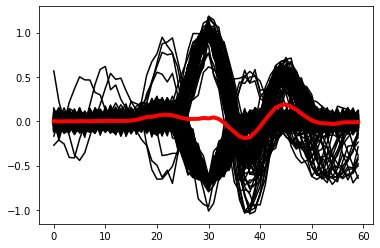

In [49]:
from scipy.signal import find_peaks

pk_loc = find_peaks(np.abs(signal).flatten(), height=0.6, distance=30)[0]

spike_matrix = []
for p in pk_loc:
    spike_matrix.append(signal[p-30:p+30])
spike_matrix = np.asarray(spike_matrix).transpose()

plt.figure()
plt.plot(spike_matrix,'k')
plt.plot(np.mean(spike_matrix, axis=1),'r',lw=4)
plt.show()

From the figure, it is evident that there are at least two neurons in this signal. We can take the first spike as the template

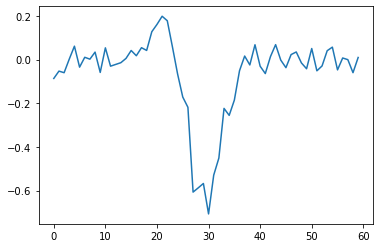

In [50]:
template = spike_matrix[:,0].squeeze()
plt.figure()
plt.plot(template)
plt.show()

We can also visually change the peak to select a second template

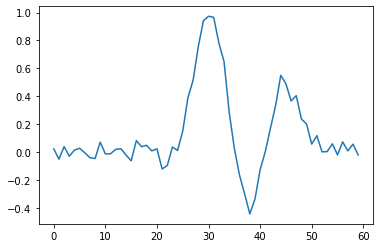

In [51]:
template_1 = spike_matrix[:,1].squeeze()
plt.figure()
plt.plot(template_1)
plt.show()

## Template-based detection

In [52]:
from scipy.signal import correlate

x_corr = correlate(signal, template, mode='same')
x_corr_1 = correlate(signal, template_1, mode='same')

pk_corr = find_peaks(x_corr, height=0.5*np.max(x_corr), distance=30)[0]
pk_corr_1 = find_peaks(x_corr_1, height=0.5*np.max(x_corr_1), distance=30)[0]

print(f'{len(pk_loc)} spikes detected with the threshold.')
print(f'{len(pk_corr)} spikes detected with template 1.')
print(f'{len(pk_corr_1)} spikes detected with template 2.')
print(f'{len(pk_corr_1)+len(pk_corr)} spikes detected with the template-matching procedure.')

455 spikes detected with the threshold.
316 spikes detected with template 1.
195 spikes detected with template 2.
511 spikes detected with the template-matching procedure.


When using the `same` mode, template and detected spikes should be aligned. It is always better to check this in order to be able to evaluate distances

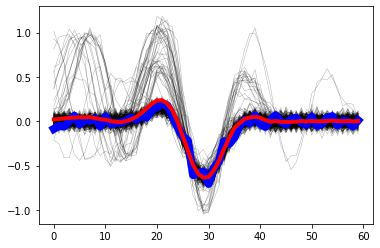

In [53]:
spikes_corr = []
for p in pk_corr:
    spikes_corr.append(signal[p-30:p+30])
spikes_corr = np.asarray(spikes_corr).squeeze().transpose()

plt.figure()
plt.plot(spikes_corr,'k', alpha=0.3, lw=0.5)
plt.plot(template, 'b', lw=8)
plt.plot(np.mean(spikes_corr, axis=1), 'r', lw=4)
plt.show()